# 💻 **Parte 1: Python (Colab)**

Herramientas: matplotlib, numpy, imageio

1. Crear una figura 2D con puntos o formas
2. Aplicar traslación, rotación y escala usando matrices de transformación
3. Generar una animación (usando bucles o interpolación)
4. Animar la transformación en función del tiempo (t) o del frame
5. Exportar como GIF animado con imageio

*Opcional: mostrar la matriz resultante de cada transformación y cómo cambia con el tiempo*

## Importar Librerias

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

* `import numpy as np`: Importa la librería NumPy para cálculos numéricos y operaciones con matrices, con el alias np.
* `import matplotlib.pyplot as plt`: Importa la librería Matplotlib para crear gráficos y visualizaciones, con el alias plt.
* `import imageio.v2 as imageio`: Importa la librería ImageIO para leer y escribir datos de imágenes, con el alias imageio.
* `import os`: Importa la librería OS para interactuar con el sistema operativo, como crear directorios.

## Definir el Triángulo


In [11]:
# Crear figura básica: triángulo en coordenadas homogéneas (3xN)
triangle = np.array([
    [0, 1, 0.5, 0],  # x
    [0, 0,   2, 0],  # y
    [1, 1,   1, 1]   # homogénea
])

* Crea un array NumPy llamado triangle que representa los vértices de un triángulo usando coordenadas homogéneas.
 - La primera fila representa las coordenadas x.
  - La segunda fila representa las coordenadas y.
  - La tercera fila es para coordenadas homogéneas (generalmente se establece en 1).

## Configurar la Animación

In [12]:
# Configuración
frames = []
n_frames = 60
output_dir = 'frames'
os.makedirs(output_dir, exist_ok=True)

- `frames = []`: Crea una lista vacía llamada frames para almacenar los fotogramas individuales de la animación.
- `n_frames = 60`: Establece el número total de fotogramas en la animación a 60.
- `output_dir = 'frames'`: Define el directorio donde se guardarán los fotogramas.
- `os.makedirs(output_dir, exist_ok=True`): Crea el directorio 'frames' si no existe.

## Bucle de Animación

In [17]:
# Animación
for i in range(n_frames):
    t = i / n_frames * 2 * np.pi  # variable de tiempo (0 a 2π)

    # Parámetros de transformación
    scale = 1 + 0.5 * np.sin(t)
    theta = t                     # ángulo de rotación
    tx, ty = 2 * np.cos(t), 2 * np.sin(t)  # traslación circular

    # Matrices de transformación
    S = np.array([[scale, 0, 0],
                  [0, scale, 0],
                  [0, 0, 1]])

    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta),  np.cos(theta), 0],
                  [0, 0, 1]])

    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])

    # Transformación compuesta: T * R * S
    M = T @ R @ S
    transformed = M @ triangle

    # Graficar
    plt.figure(figsize=(5, 5))
    plt.plot(transformed[0], transformed[1], 'bo-', label='Transformado')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(True)
    plt.title(f'Frame {i+1}')
    plt.legend()

    # Mostrar la matriz (opcional)
    matrix_text = "\n".join([" ".join(f"{cell:6.2f}" for cell in row) for row in M])
    plt.text(-4, -4, matrix_text, fontsize=8, family='monospace')

    # Guardar frame
    fname = f"{output_dir}/frame_{i:03d}.png"
    plt.savefig(fname)
    frames.append(imageio.imread(fname))
    plt.close()

- `for i in range(n_frames)`: Este bucle itera `n_frames` veces (60 en este caso), creando un fotograma por iteración.
- `t = i / n_frames * 2 * np.pi`: Calcula una variable de tiempo t que va de 0 a 2π durante la animación. Se utiliza para controlar las transformaciones.
- **Parámetros de transformación:**
  * scale: Calcula un factor de escala que cambia sinusoidalmente con el tiempo.
  * theta: El ángulo de rotación, directamente vinculado al tiempo t.
  * tx, ty: Calculan los valores de traslación x e y para el movimiento circular.
- **Matrices de transformación:**
  * S: La matriz de escala.
  * R: La matriz de rotación.
  * T: La matriz de traslación.
- **Aplicar transformaciones:**

  - `M = T @ R @ S`: Combina las transformaciones en una sola matriz M (traslación, luego rotación, luego escala).
  - `transformed = M @ triangle`: Aplica la matriz de transformación M a las coordenadas del triangle.


## Dibujar y Guardar Fotogramas


- **Dibujar**: Crea un gráfico del triángulo transformado.
- **Guardar el fotograma**: Guarda el gráfico actual como una imagen PNG en el directorio 'frames'.
- **Agregar a la lista de fotogramas**: Agrega la imagen guardada a la lista frames.
- **Cerrar el gráfico**: Cierra el gráfico actual para preparar el siguiente fotograma.

## Mostrar el GIF


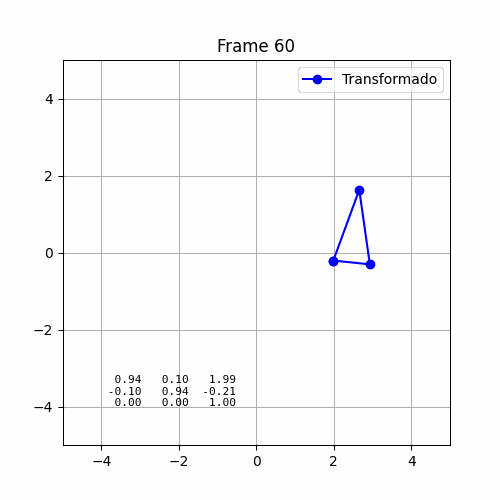

In [24]:
# Crear GIF
imageio.mimsave('animacion_transformacion.gif', frames, duration=0.02)

Image(filename='/content/animacion_transformacion.gif')

- `imageio.mimsave(...)`: Toma todos los fotogramas guardados en la lista frames y los combina en una animación GIF llamada 'animacion_transformacion.gif'. duration controla el retraso entre fotogramas.
- **Mostrar el GIF en el documento**: Las últimas tres líneas permiten mostrar el GIF directamente en la salida de tu Jupyter Notebook.